In [54]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [55]:
data = pd.read_csv("hepatitis_csv.csv")

In [56]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [57]:
data.shape

(155, 20)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [59]:

data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [60]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [61]:
# Filling missing value with mean
numerical_variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']

In [62]:
data["bilirubin"] = data.bilirubin.astype(float)
data["protime"] = data.protime.astype(float)
data["alk_phosphate"] = data["alk_phosphate"].astype(float)
data["sgot"] = data.sgot.astype(float)
data["albumin"] = data.albumin.astype(float)

In [63]:
data[numerical_variables].fillna(data[numerical_variables].mean()).head(5)

,age,bilirubin,protime,albumin,alk_phosphate,sgot
0,30,1.0,61.852273,4.0,85.000000,18.0
1,50,0.9,61.852273,3.5,135.000000,42.0
2,78,0.7,61.852273,4.0,96.000000,32.0
3,31,0.7,80.000000,4.0,46.000000,52.0
4,34,1.0,61.852273,4.0,105.325397,200.0


In [64]:
rep = {'no': 0,
               'yes': 1,
               'die': 0,
               'live': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

data.replace(rep, inplace = True)
data = data.astype(float)

In [65]:
hepatitis_analysis = data.dropna()
imp_values = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
hepatitis_analysis = hepatitis_analysis[imp_values]
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


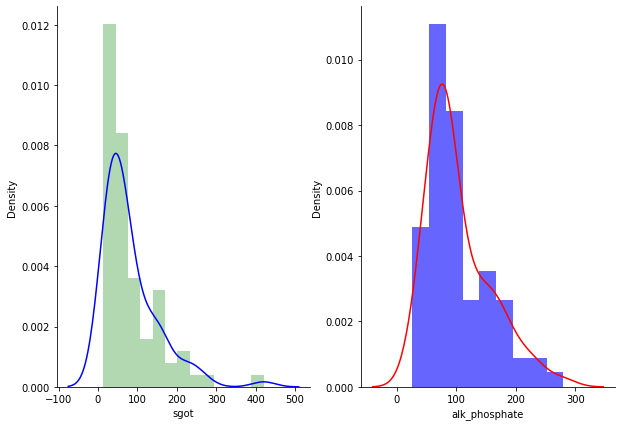

In [66]:

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['sgot'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['alk_phosphate'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"blue","alpha":0.6})
sns.despine();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


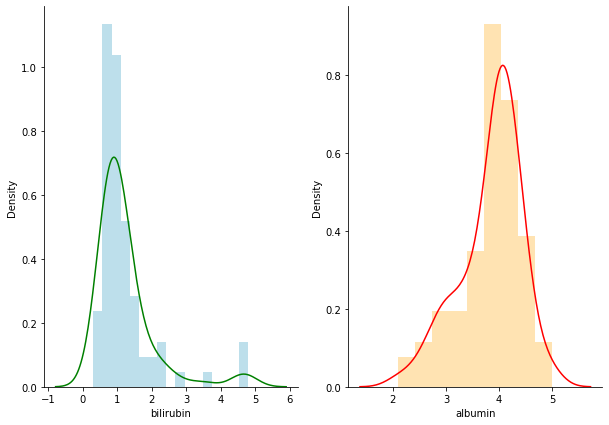

In [67]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis["bilirubin"],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"orange","alpha":0.3})
sns.despine();

In [68]:

hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = hepatitis_analysis[['albumin','alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


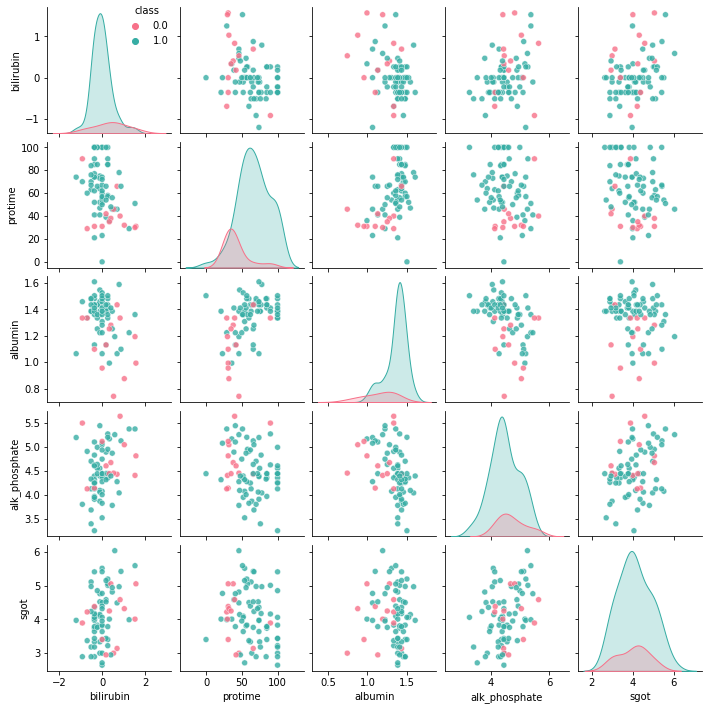

In [69]:
g = sns.pairplot(hepatitis_analysis, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; y

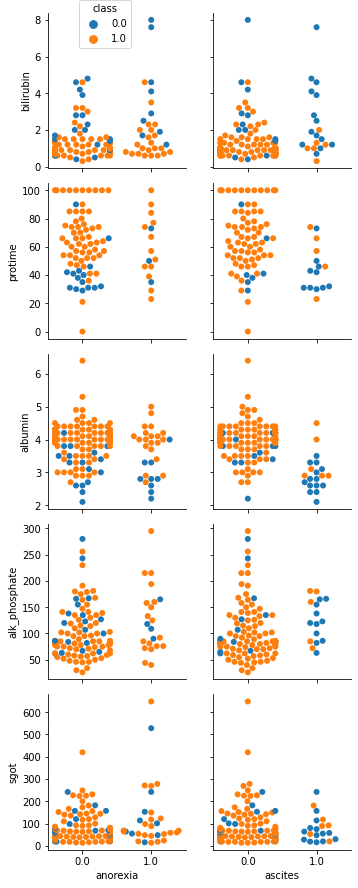

In [70]:
graph = sns.PairGrid(data,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

From the plots, i can highlight several things:


I can observed that in some our variables patients tend to differentiate according to whether they belong to Class 0 or Class 1.

There is not a linear relationship between the variables plotted. 

 In some of them we can observed a trend to an interaction .

In [73]:
categorical_variables = ['sex' , 'steriod', 'antivirals', 'fatigue','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']

In [74]:

corr = data.dropna().corr(method = 'pearson')

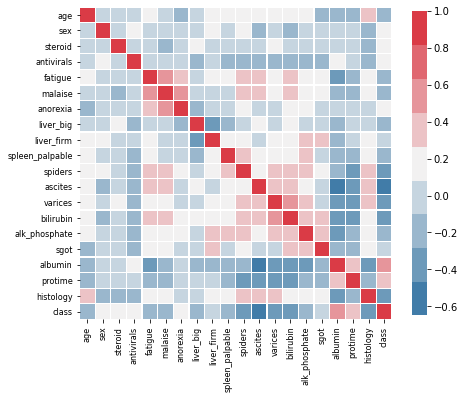

In [75]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);


WI can observe in the heatmap that some of the variables show a coefficient of ~0.6 or -0.4, but most of them display a very low correlation coefficient.
 So i can conclude that there is no strong linear correlation between our variables.